In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('Training.csv')

In [57]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [58]:
df.shape

(4920, 133)

In [59]:
print(f"Number of Unique Diseases in the dataset is {df['prognosis'].nunique()} that are as follows: \n")
print(df['prognosis'].unique())

Number of Unique Diseases in the dataset is 41 that are as follows: 

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [60]:
df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

**EDA**

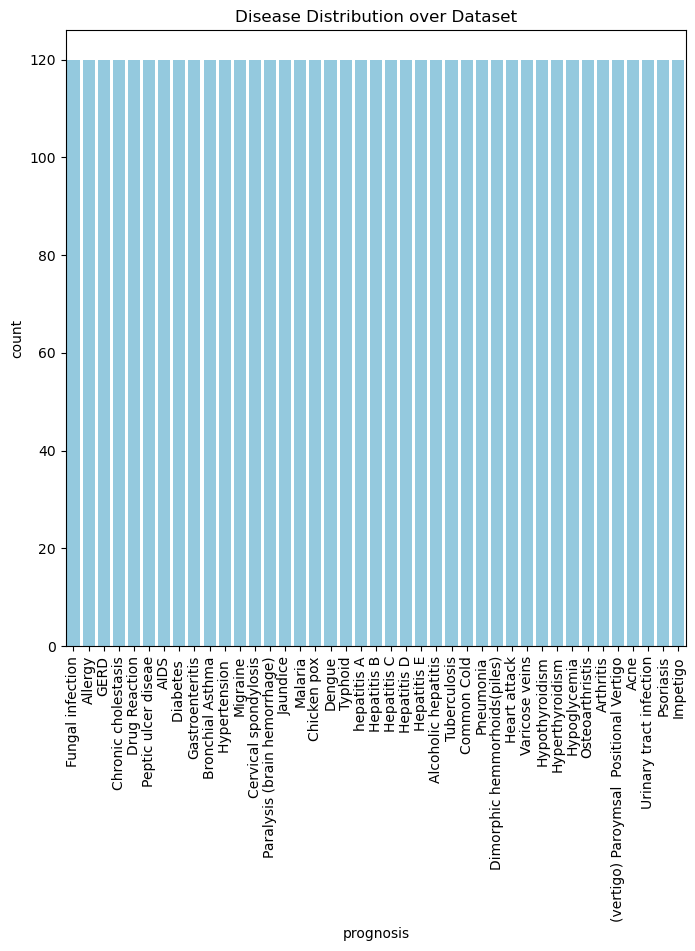

In [61]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'prognosis',data=df,color='skyblue')
plt.title("Disease Distribution over Dataset")
plt.xticks(rotation='vertical')
plt.show()
# inference--> we have 120 instance for each disease

In [62]:
# inference--> since we have processed data we only need to Encode our Target column that is 'prognosis'

**Model Training**

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [64]:
X = df.drop('prognosis',axis=1)
y = df['prognosis']

In [65]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [66]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [67]:
y

array([15, 15, 15, ..., 38, 35, 27])

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

In [69]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3444, 132), (1476, 132), (3444,), (1476,))

In [70]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [71]:
models = {
    "SVM" : SVC(kernel='linear'),
    'Random_Forest' : RandomForestClassifier(n_estimators=100,random_state=30),
    'Gradient_Boost' : GradientBoostingClassifier(n_estimators=100,random_state=30),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'MNB' : MultinomialNB()
}

In [72]:
def training_and_evaluation(models):
    for model_name,model in models.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print(f"Evaluation of model {model_name}: \n")
        print(f"Accuracy Score : {accuracy_score(y_pred,y_test)}")
        print(f"Confusion Matrix : \n {np.array2string(confusion_matrix(y_pred,y_test),separator=', ')}")
        print("---"*50)

In [73]:
training_and_evaluation(models)

Evaluation of model SVM: 

Accuracy Score : 1.0
Confusion Matrix : 
 [[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation of model Random_Forest: 

Accuracy Score : 1.0
Confusion Matrix : 
 [[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation of model Gradient_Boost: 

Accuracy Score : 1.0
Confusion Matrix : 
 [[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 

**Training Single Model and Predict**

In [75]:
model_svc  = SVC(kernel='linear')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0


In [138]:
import pickle 
with open('model_svc.pkl','wb') as f:
    pickle.dump(model_svc,f)

with open('encoder.pkl','wb') as f:
    pickle.dump(encoder,f)

In [139]:
with open('model_svc.pkl','rb') as f:
    model_svc = pickle.load(f)

with open('encoder.pkl','rb') as f:
    enc = pickle.load(f)

In [140]:
X_test.iloc[0].values.reshape(1,-1).shape

(1, 132)

In [141]:
# test 1
print("Predicted Disease : ",encoder.inverse_transform(model_svc.predict(X_test.iloc[0].values.reshape(1,-1)))[0])
print("Actual Disease: ",encoder.inverse_transform(y_test[0].reshape(1,-1))[0])

Predicted Disease :  hepatitis A
Actual Disease:  hepatitis A


In [142]:
# test 2
print("Predicted Disease : ",encoder.inverse_transform(model_svc.predict(X_test.iloc[3].values.reshape(1,-1)))[0])
print("Actual Disease: ",encoder.inverse_transform(y_test[3].reshape(1,-1))[0])

Predicted Disease :  Chronic cholestasis
Actual Disease:  Chronic cholestasis


**Loading other Databases**

In [143]:
# inference --> these datasets are prepared by field experts
dis_sym = pd.read_csv("symtoms_df.csv")
precautions = pd.read_csv("precautions_df.csv")
workout = pd.read_csv("workout_df.csv")
description = pd.read_csv("description.csv")
diets = pd.read_csv("diets.csv")
medications = pd.read_csv("medications.csv")
sym_sev = pd.read_csv("Symptom-severity.csv")

In [212]:
def about_disease(dis):
    desc = description[description['Disease'] == dis]['Description']
    desc = " ".join([p for p in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1','Precaution_2','Precaution_3','Precaution_4']]
    pre = [p for p in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = " ".join([p for p in med.values])

    diet = diets[diets['Disease'] == dis]['Diet']
    diet = [p for p in diet.values]

    wrk = workout[workout['disease'] == dis]['workout']
    wrk =[p for p in wrk.values]
    
    return desc,pre,med,diet,wrk


symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

def predict_disease(symptoms):
    input_vec = np.zeros(len(symptoms_dict))
    for symptom in symptoms:
        input_vec[symptoms_dict[symptom]] = 1
        prediction = enc.inverse_transform(model_svc.predict(input_vec.reshape(1,-1)))[0]
        return prediction

In [193]:
symptoms = input("Enter your symptoms.....")
user_symptom = [s.strip() for s in symptoms.split(',')]
user_symptom = [sym.strip("[]' ") for sym in user_symptom]
prediction = predict_disease(user_symptom)

In [213]:
print("Disease : ",prediction)
desc,pre,med,diet,wrk = about_disease(prediction)
print(f" Description : {desc}\n Precautions : {list(pre)}\n Medications : {med}\n Diet : {diet}\n Workout : {wrk}")

Disease :  Fungal infection
 Description : Fungal infection is a common skin condition caused by fungi.
 Precautions : [array(['bath twice', 'use detol or neem in bathing water',
       'keep infected area dry', 'use clean cloths'], dtype=object)]
 Medications : ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
 Diet : ["['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']"]
 Workout : ['Avoid sugary foods', 'Consume probiotics', 'Increase intake of garlic', 'Include yogurt in diet', 'Limit processed foods', 'Stay hydrated', 'Consume green tea', 'Eat foods rich in zinc', 'Include turmeric in diet', 'Eat fruits and vegetables']
